## 1. Notebook Initialization

In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from random import randint

In [2]:
# Opciones de pandas
rows, cols = 400, 100
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
# Rutas
PATH = "../../data/fundamental_data/"

## 2. Preliminar Tests

In [6]:
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
#data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m'), inplace=True)
data

,FCF,PricePerShare,ROE,QMonth,Prediction
1985-03,-1.232322,-1.079314,-0.669004,-1.336060,13.035309
1985-06,-1.232322,-1.084088,-0.669004,-0.439081,13.160484
1985-09,-1.232322,-1.081432,-0.669004,0.457899,16.657703
1985-12,-1.232322,-1.007231,-0.669004,1.354878,16.345213
1986-03,-1.232322,-1.013861,-0.669004,-1.336060,15.921562
1986-06,-1.232322,-1.022850,-0.669004,-0.439081,14.741072
1986-09,-1.232322,-1.047896,-0.669004,0.457899,13.267827
1986-12,-1.232322,-1.079154,-0.669004,1.354878,16.734827
1987-03,-1.232322,-1.005595,-0.669004,-1.336060,18.234604
1987-06,-1.232322,-0.973774,-0.669004,-0.439081,17.033018


In [7]:
X_scaled = np.array(data.drop(['Prediction'], axis=1))
y_scaled = np.array(data['Prediction'])

In [8]:
# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2)
y_train = y_train.ravel()
y_test = y_test.ravel()

In [9]:
svr = GridSearchCV(SVR(), n_jobs=-1, scoring="neg_root_mean_squared_error",
                   param_grid={"kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
                               "C": [1, 3, 5, 7],
                               "gamma": [0.00009, 0.00008, 0.00007, 0.00006, 0.0001],
                                "epsilon": [0.0001, 0.0003, 0.0005, 0.0008, 0.01]})

In [8]:
svr = GridSearchCV(SVR(),
                   param_grid={"kernel": ['linear', 'poly', 'rbf'],
                               "degree": [1, 2, 3, 4, 5, 6],
                               "C": [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 24, 26, 28, 30],
                               "gamma": [0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.01, 0.03, 0.05, 0.1, 0.2, 0.3, 0.4],
                                "epsilon": [0.0001, 0.0003, 0.0005, 0.0008, 0.009, 0.01, 0.02, 0.1, 0.2, 0.3, 0.4]})

In [70]:
# Create and train the Support Vector Machine (Regressor) 
#svr = svr = SVR(kernel='rbf', C=14.0, gamma=0.03, epsilon=0.4)
#svr = SVR(kernel='rbf', C=200, gamma=0.98, epsilon=0.05)
svr.fit(X_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [14, 15, 16, 17, 18, 19, 20, 22, 24, 26, 28, 30],
                         'epsilon': [0.0001, 0.0003, 0.0005, 0.0008, 0.01, 0.1,
                                     0.2, 0.3, 0.4],
                         'gamma': [0.001, 0.01, 0.03, 0.05, 0.1, 0.2, 0.3, 0.4],
                         'kernel': ['rbf']})

In [11]:
HOLDOUT = 10
params = dict()
for i in range(HOLDOUT):
    # Split the data into 80% training and 20% testing
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=i)
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    # Train model
    svr.fit(X_train, y_train)
    # Get best params
    param = str(svr.best_params_)
    if param in list(params.keys()):
        params[param]['count'] += 1
        params[param]['train_score'].append(svr.score(X_train, y_train))
        params[param]['test_score'].append(svr.score(X_test, y_test))
        params[param]['random_seeds'].append(i)
    else:
        params[param] = {'count':1, 'train_score':[svr.score(X_train, y_train)], 'test_score':[svr.score(X_test, y_test)], 'random_seeds':[i]}
for key in (params.keys()):
    print('Params={}\nCount:{}\nTrain_Score:{}\nTest_Score:{}\nRandom_Seeds:{}\n\n'.format(key,params[key]['count'], np.mean(params[key]['train_score']), np.mean(params[key]['test_score']), str(params[key]['random_seeds'])))

/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [7]:
#Results log
#Params={'C': 7, 'epsilon': 0.0001, 'gamma': 9e-05, 'kernel': 'linear', 'rs': [0, 2, 3, 4, 8]} #Serial
#Params={'C': 7, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear', 'rs': [0, 2, 3, 5, 8, 9]} #PricePerShare
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=Params['rs'][randint(0,len(Params['rs'])-1)])
y_train = y_train.ravel()
y_test = y_test.ravel()
svr = SVR(kernel=Params['kernel'], C=Params['C'], gamma=Params['gamma'], epsilon=Params['epsilon'])
svr.fit(X_train, y_train)

SVR(C=7, epsilon=0.01, gamma=9e-05, kernel='linear')

In [8]:
svr.score(X_train, y_train)

0.9757620624849005

In [9]:
svr.score(X_test, y_test)

0.9485368752714098

In [10]:
mean_squared_error(y_test, svr.predict(X_test), squared=False)

11.029207951077487

In [149]:
#abs_sc_predict.inverse_transform(svr.predict(X_pred_scaled).reshape(1,-1))
sc_predict.inverse_transform(svr.predict(X_scaled[-1:, :]))

array([71.34155587])

In [166]:
#abs_sc_predict.inverse_transform(y_scaled[-1:, :])
sc_predict.inverse_transform(y_scaled[-1:, :])

array([[115.6105423]])

In [246]:
X_pred_scaled[:,-1]

array([1.53023942, 1.68216111, 1.68716952, 1.69217793])

In [247]:
X_scaled[:,-1]

array([-1.65677714, -1.65176873, -1.64676032, -1.64175192, -1.48983023,
       -1.48482182, -1.47981341, -1.474805  , -1.32288331, -1.31787491,
       -1.3128665 , -1.30785809, -1.1559364 , -1.15092799, -1.14591959,
       -1.14091118, -0.98898949, -0.98398108, -0.97897267, -0.97396427,
       -0.82204258, -0.81703417, -0.81202576, -0.80701735, -0.65509566,
       -0.65008726, -0.64507885, -0.64007044, -0.48814875, -0.48314034,
       -0.47813193, -0.47312353, -0.32120184, -0.31619343, -0.31118502,
       -0.30617661, -0.15425492, -0.14924652, -0.14423811, -0.1392297 ,
        0.01269199,  0.0177004 ,  0.0227088 ,  0.02771721,  0.1796389 ,
        0.18464731,  0.18965572,  0.19466412,  0.34658581,  0.35159422,
        0.35660263,  0.36161104,  0.51353273,  0.51854113,  0.52354954,
        0.52855795,  0.68047964,  0.68548805,  0.69049645,  0.69550486,
        0.84742655,  0.85243496,  0.85744337,  0.86245177,  1.01437346,
        1.01938187,  1.02439028,  1.02939869,  1.18132038,  1.18

In [11]:
PRED = svr.predict(X_scaled)

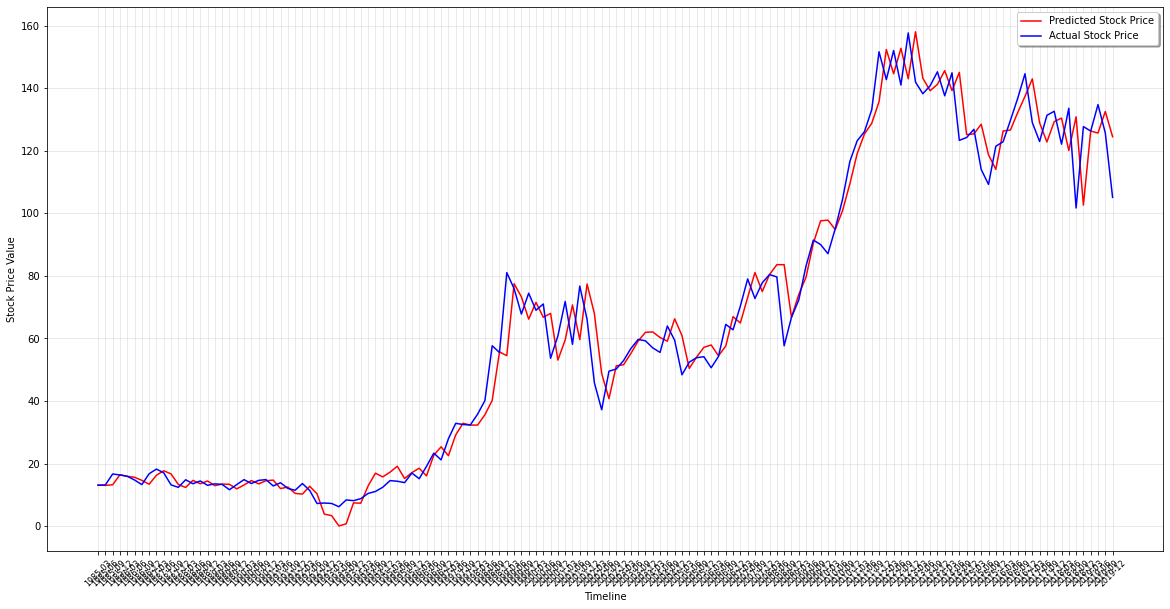

RMSE 8.177283606985362
RMSE test: 11.029207951077487


In [12]:
#params = str(Params)
# Chage on attributes and no change on PricePerShare
# Reduced attributes v2
# TSCO

# Plot parameters
START_DATE_FOR_PLOTTING = '1985-03'
ENDING_DATE_FOR_PLOTTING = '2020-03'
START_INDEX = data.index.get_loc(START_DATE_FOR_PLOTTING)
ENDING_INDEX = data.index.get_loc(ENDING_DATE_FOR_PLOTTING)
fig1,ax1 = plt.subplots(figsize=(20,10))


plt.plot(data.index[START_INDEX:ENDING_INDEX], PRED[START_INDEX:ENDING_INDEX], color='red', label='Predicted Stock Price')
plt.plot(data.index[START_INDEX:ENDING_INDEX], y_scaled[START_INDEX:ENDING_INDEX], color='b', label='Actual Stock Price')

#plt.axvline(x = data.index[-5], color='green', linewidth=2, linestyle='--')

plt.grid(which='major', color='#cccccc', alpha=0.5)

plt.legend(shadow=True)
#plt.title(params, family='DejaVu Sans', fontsize=12)
plt.xlabel('Timeline', family='DejaVu Sans', fontsize=10)
plt.ylabel('Stock Price Value', family='DejaVu Sans', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.show()

print("RMSE",mean_squared_error(y_scaled, PRED, squared=False))
print("RMSE test:",mean_squared_error(y_test, svr.predict(X_test), squared=False))

## 3.1 Random split - No scaled prediction variable

In [5]:
from lib.fundamental_lib import holdout
from random import randrange
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
svr = GridSearchCV(SVR(), n_jobs=-1, error_score=1,
                   param_grid={"kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
                               "C": [1, 3, 5, 7],
                               "gamma": [0.00009, 0.00008, 0.00007, 0.00006, 0.0001],
                                "epsilon": [0.0001, 0.0003, 0.0005, 0.0008, 0.01]
                              },
                   scoring="neg_root_mean_squared_error"
)
#data = pd.read_csv(PATH+'{}_Manual_dataset.csv'.format(stocks[randrange(0,len(stocks))]), header=0, index_col=0, low_memory=False)
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
holdout(data, svr, scaling=False)

Params={'C': 7, 'epsilon': 0.0008, 'gamma': 9e-05, 'kernel': 'linear'}
Count:1
Train_Measure:7.3133945155441795
Test_Measure:7.3133945155441795
Random_Seeds:[0]


Params={'C': 7, 'epsilon': 0.0001, 'gamma': 9e-05, 'kernel': 'linear'}
Count:5
Train_Measure:7.791268514822084
Test_Measure:7.934515737535489
Random_Seeds:[1, 3, 6, 7, 8]


Params={'C': 7, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear'}
Count:3
Train_Measure:7.948251952711353
Test_Measure:7.121106349193681
Random_Seeds:[2, 5, 9]


Params={'C': 7, 'epsilon': 0.0003, 'gamma': 9e-05, 'kernel': 'linear'}
Count:1
Train_Measure:7.416407750738132
Test_Measure:7.416407750738132
Random_Seeds:[4]




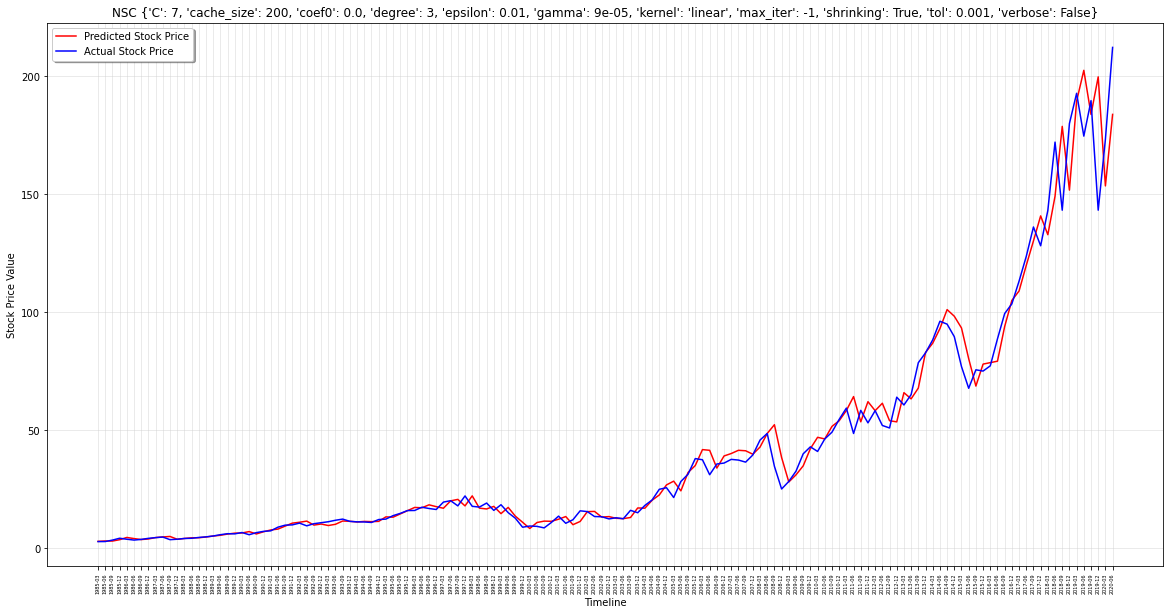

NSC MODEL RESULTS
 RMSE
 	Train: 9.56424088999193
 	Test: 2.907907220094009
 	Dataset: 8.639370784936174
 MAPE
 	Train: 0.10098319023056214
 	Test: 0.08603908922627602
 	Dataset: 0.09795256834857406
 R2 Score Adj
 	Train: 0.9655060546887
 	Test: 0.9909899770505057
 	Dataset: 0.9686415279209587



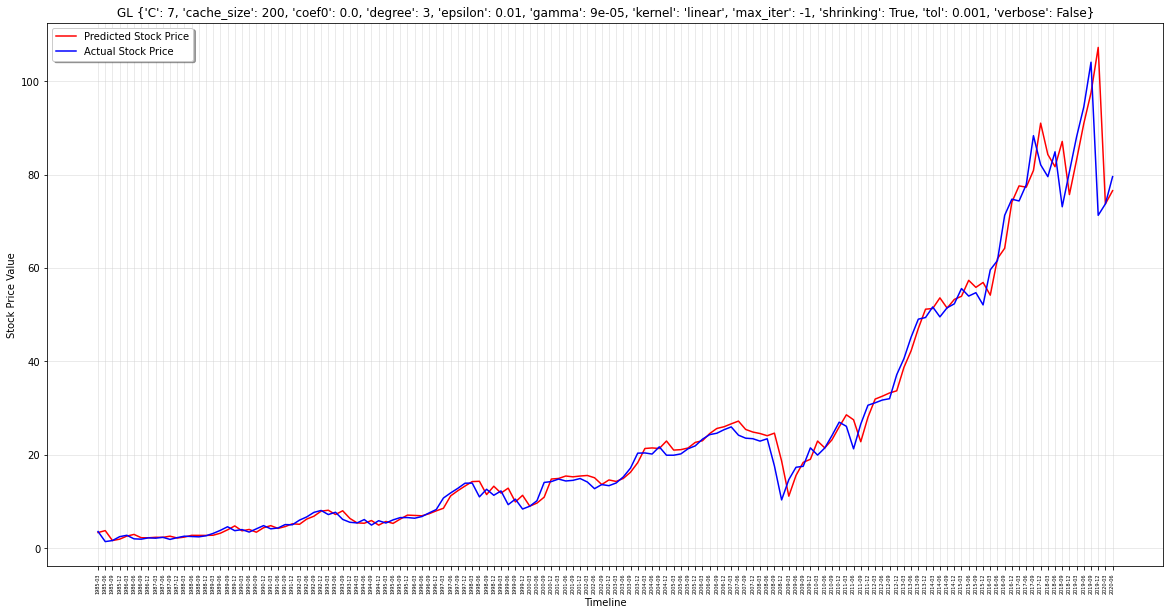

GL MODEL RESULTS
 RMSE
 	Train: 4.486916560172344
 	Test: 1.9412240038893285
 	Dataset: 4.100467373336656
 MAPE
 	Train: 0.10959069956728938
 	Test: 0.10423960713652823
 	Dataset: 0.10850551299042173
 R2 Score Adj
 	Train: 0.9701588077739065
 	Test: 0.9890017546556825
 	Dataset: 0.9731868390073666



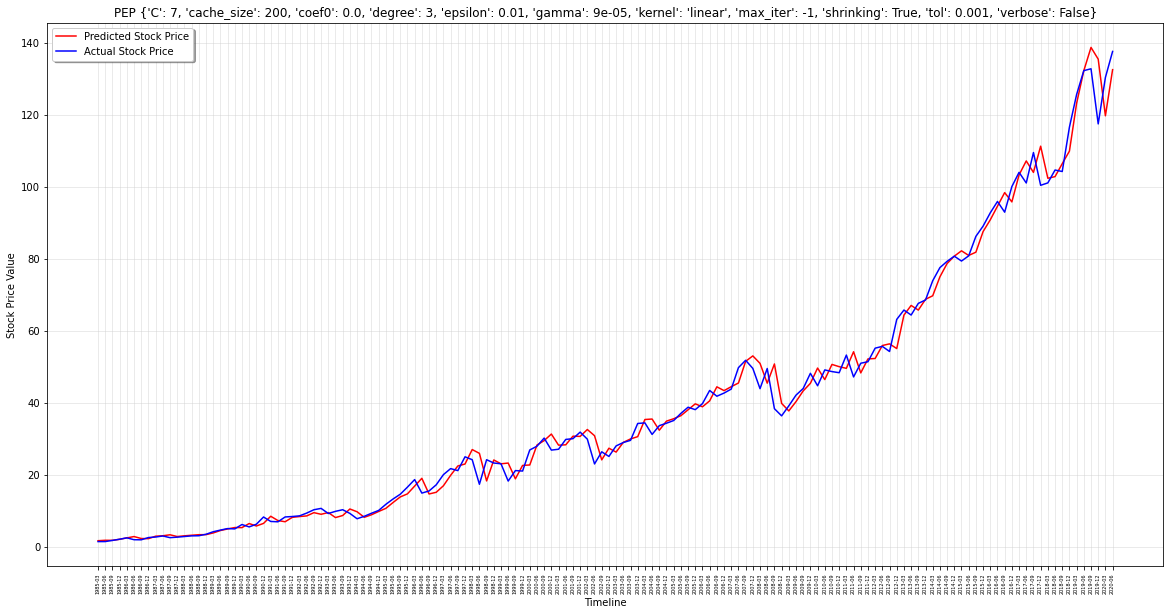

PEP MODEL RESULTS
 RMSE
 	Train: 3.8017027620625745
 	Test: 2.218816818418863
 	Dataset: 3.5384075452217085
 MAPE
 	Train: 0.08299412825933973
 	Test: 0.07511317187636991
 	Dataset: 0.08139589234950668
 R2 Score Adj
 	Train: 0.9892371475269854
 	Test: 0.9929613551610968
 	Dataset: 0.9899874087899323



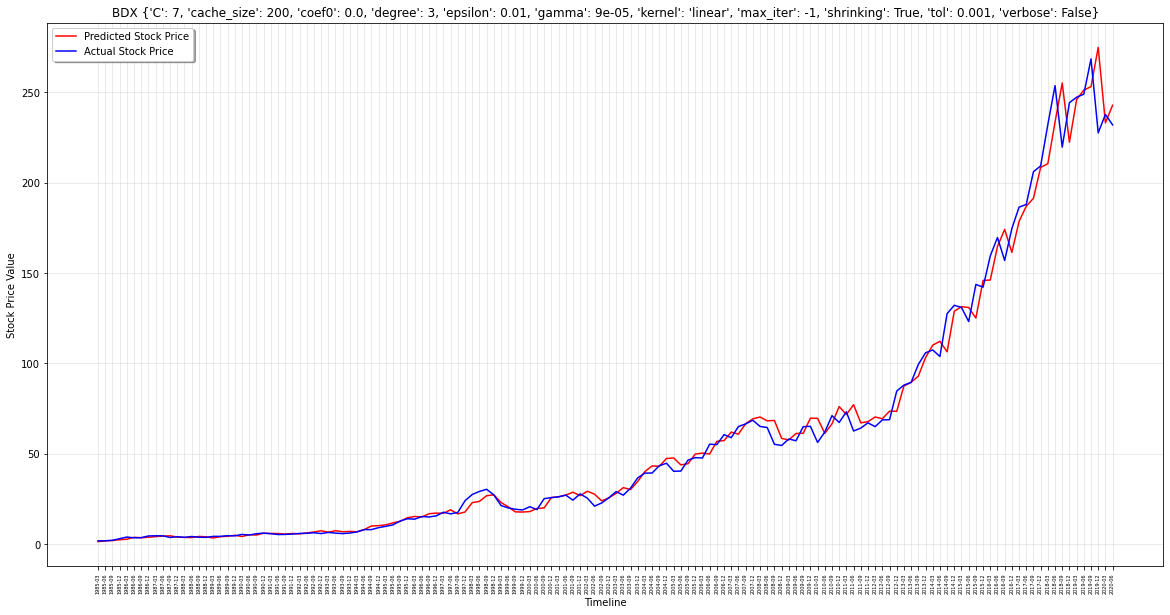

BDX MODEL RESULTS
 RMSE
 	Train: 8.28086584876861
 	Test: 5.314539286869057
 	Dataset: 7.771373764365967
 MAPE
 	Train: 0.07734485360169899
 	Test: 0.09455942506122966
 	Dataset: 0.08083592054104437
 R2 Score Adj
 	Train: 0.9869654310115225
 	Test: 0.9874545348308351
 	Dataset: 0.9873872655175646



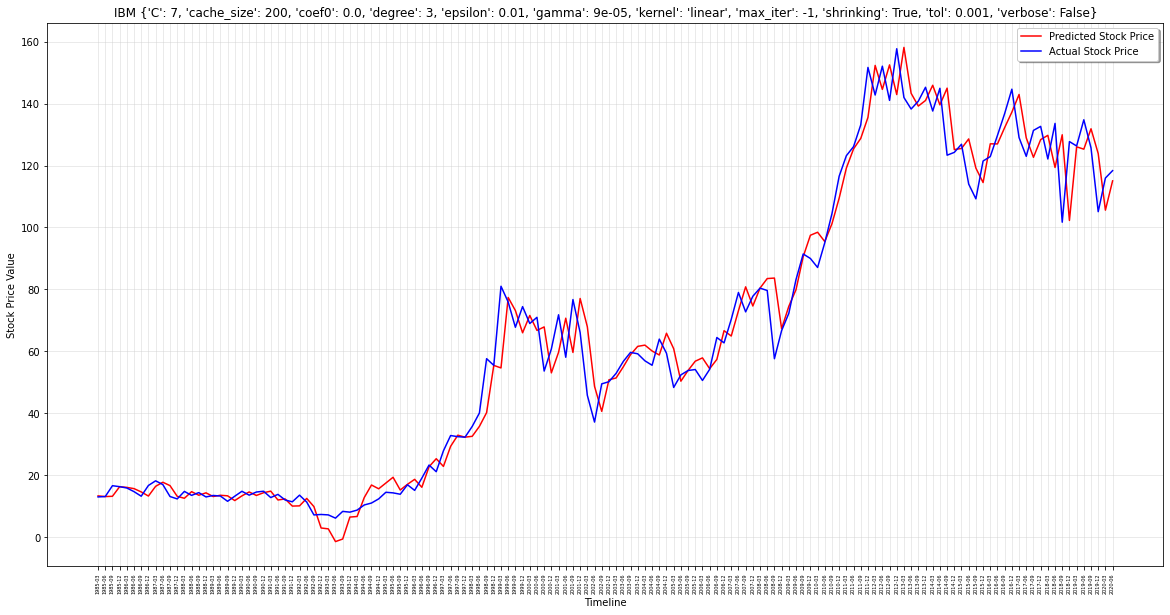

IBM MODEL RESULTS
 RMSE
 	Train: 8.769362157869793
 	Test: 5.245833561554127
 	Dataset: 8.178446672186203
 MAPE
 	Train: 0.1210702859084635
 	Test: 0.14914598967338966
 	Dataset: 0.12676396009855342
 R2 Score Adj
 	Train: 0.9656716445355511
 	Test: 0.9807737753317781
 	Dataset: 0.9690911042527153



In [3]:
from lib.fundamental_lib import model_results
#Best Params
#Params={'C': 7, 'epsilon': 0.0001, 'gamma': 9e-05, 'kernel': 'linear', 'rs': [0, 2, 3, 4, 8]} #2
Params={'C': 7, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear', 'rs': [0, 2, 3, 5, 8, 9]} #1
#Params={'C': 1, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear', 'rs': [1, 4, 7]} #P/S, P/B
svr = SVR(kernel=Params['kernel'], C=Params['C'], gamma=Params['gamma'], epsilon=Params['epsilon'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_Manual_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results(data, svr, label=stock, scaling=False)

## 3.2 Random split - Scaled prediction variable

In [ ]:
from lib.fundamental_lib import holdout
svr = GridSearchCV(SVR(), n_jobs=-1, #error_score=1,
                   param_grid={"kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
                               "C": [1, 3, 5, 7],
                               "gamma": [0.00009, 0.00008, 0.00007, 0.00006, 0.0001],
                                "epsilon": [0.0001, 0.0003, 0.0005, 0.0008, 0.01]
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
holdout(data, svr, scaling=True)

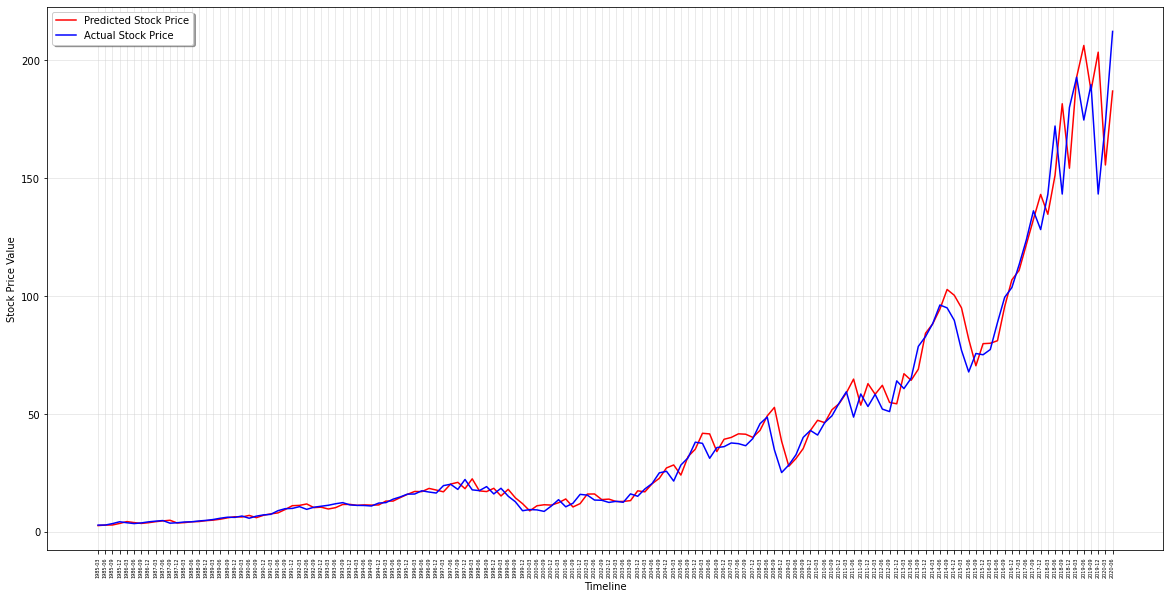

NSC MODEL RESULTS
 RMSE
 	Train: 9.765149539098152
 	Test: 2.7517754817968276
 	Dataset: 8.806555238905368
 MAPE
 	Train: 0.1034484678953831
 	Test: 0.09267480668360574
 	Dataset: 0.10126359953774992
 R2 Score Adj
 	Train: 0.964041658295896
 	Test: 0.9919315372335556
 	Dataset: 0.9674161202784524



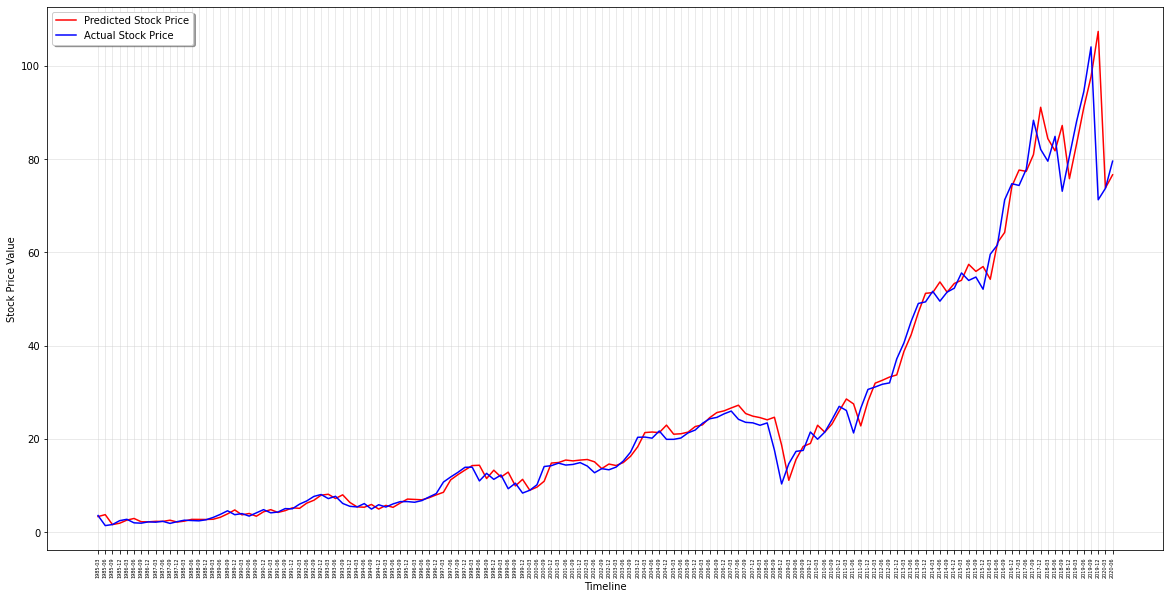

GL MODEL RESULTS
 RMSE
 	Train: 4.497055681477735
 	Test: 1.9362953482977112
 	Dataset: 4.108840943932628
 MAPE
 	Train: 0.1096336789263884
 	Test: 0.10446280159335729
 	Dataset: 0.10858503946724223
 R2 Score Adj
 	Train: 0.9700237906340234
 	Test: 0.9890575315775003
 	Dataset: 0.973077216798842



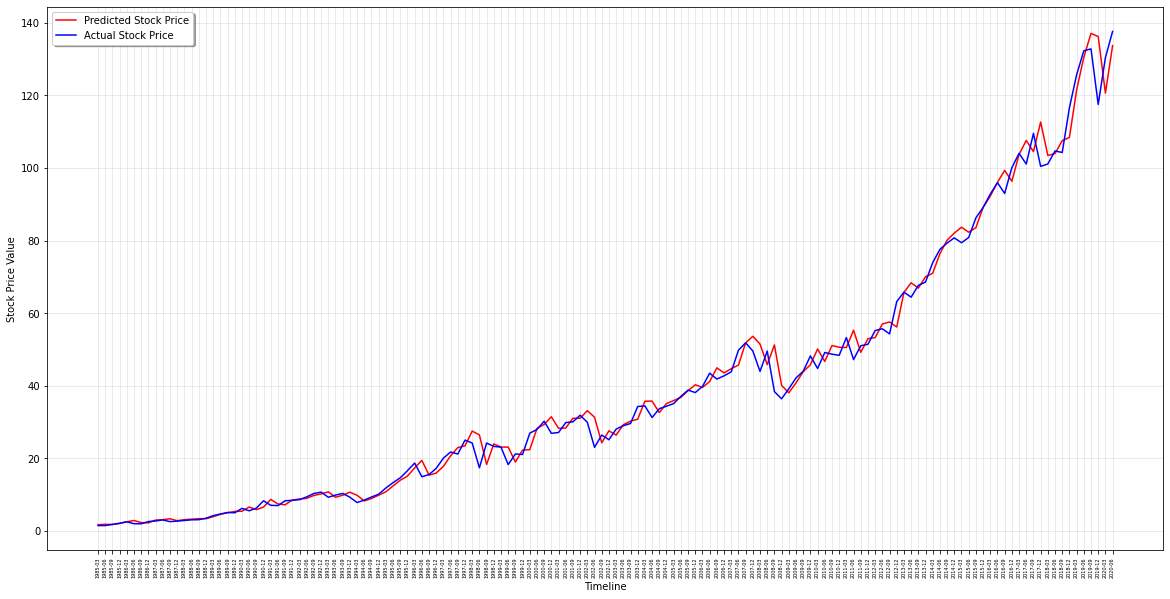

PEP MODEL RESULTS
 RMSE
 	Train: 3.8436980822355253
 	Test: 2.3999315616498356
 	Dataset: 3.5980454848877574
 MAPE
 	Train: 0.08312325781810309
 	Test: 0.06320611429667596
 	Dataset: 0.07908411682424722
 R2 Score Adj
 	Train: 0.9881407239441715
 	Test: 0.994617595992486
 	Dataset: 0.9896470508992612



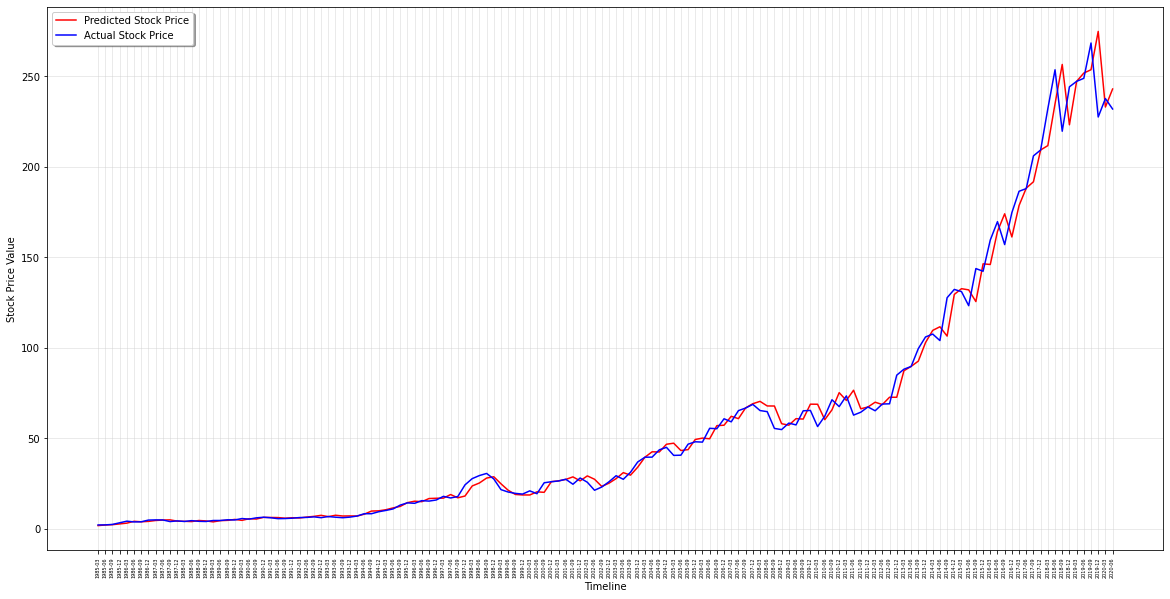

BDX MODEL RESULTS
 RMSE
 	Train: 8.225653035651886
 	Test: 5.1543527363933475
 	Dataset: 7.702442237422052
 MAPE
 	Train: 0.07326893242088166
 	Test: 0.08609413504133026
 	Dataset: 0.07586984763761599
 R2 Score Adj
 	Train: 0.9871386679679858
 	Test: 0.9881994079383012
 	Dataset: 0.9876100213001473



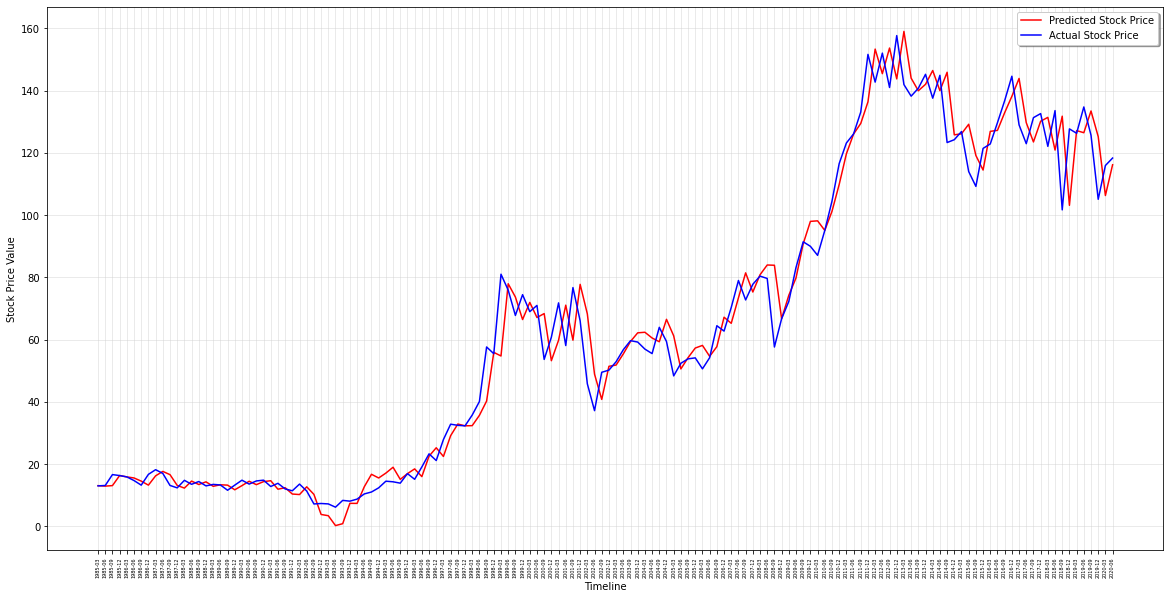

IBM MODEL RESULTS
 RMSE
 	Train: 8.858098593824446
 	Test: 5.161347690813518
 	Dataset: 8.243522402613042
 MAPE
 	Train: 0.11811341291278098
 	Test: 0.13261962910938155
 	Dataset: 0.12105523298062305
 R2 Score Adj
 	Train: 0.9649733981044984
 	Test: 0.9813880777163365
 	Dataset: 0.9685972644178729



In [4]:
from lib.fundamental_lib import model_results
#Results log
#Params={'C': 7, 'epsilon': 0.0001, 'gamma': 9e-05, 'kernel': 'linear', 'rs': [0, 2, 3, 4, 8]} #2
#Params={'C': 7, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear', 'rs': [0, 2, 3, 5, 8, 9]} #1
#Params={'C': 1, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear', 'rs': [1, 4, 7]} #P/S, P/B
Params={'C': 1, 'epsilon': 0.0003, 'gamma': 9e-05, 'kernel': 'linear'}
svr = SVR(kernel=Params['kernel'], C=Params['C'], gamma=Params['gamma'], epsilon=Params['epsilon'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_Manual_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results(data, svr, label=stock, scaling=True)

## 3.3 Sequential split - No scaled prediction variable

In [ ]:
from lib.fundamental_lib import holdout
svr = GridSearchCV(SVR(), n_jobs=-1, #error_score=1,
                   param_grid={"kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
                               "C": [1, 3, 5, 7],
                               "gamma": [0.00009, 0.00008, 0.00007, 0.00006, 0.0001],
                                "epsilon": [0.0001, 0.0003, 0.0005, 0.0008, 0.01]
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
holdout(data, svr, scaling=False, manual=True)

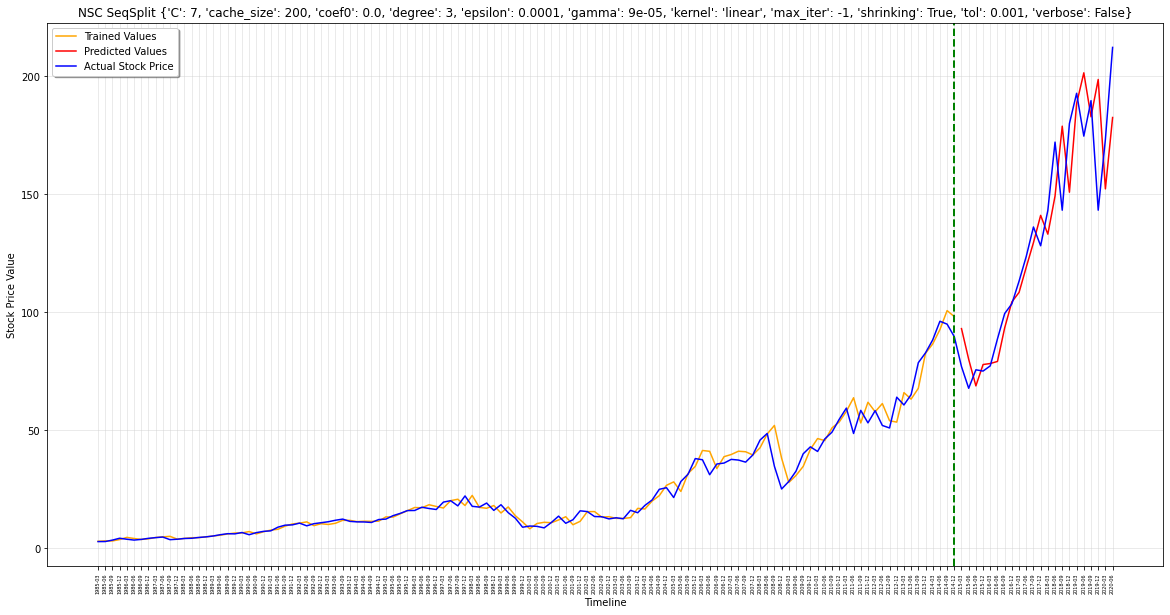

NSC MODEL RESULTS
 RMSE
 	Train: 3.8465815395617167
 	Test: 19.67268421631768
 	Dataset: 8.640802678649353
 MAPE
 	Train: 0.09443038575900878
 	Test: 0.10688094294951592
 	Dataset: 0.09643292292950995
 R2 Score Adj
 	Train: 0.9680616173435875
 	Test: 0.7917638363756885
 	Dataset: 0.968631132321283



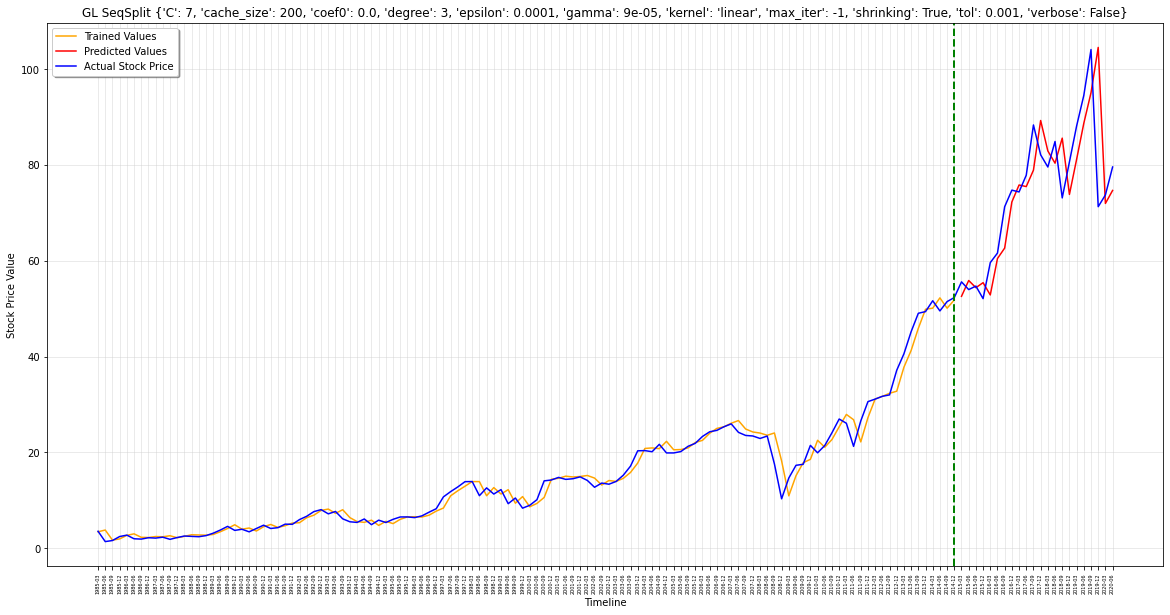

GL MODEL RESULTS
 RMSE
 	Train: 1.7761232939431246
 	Test: 9.292939424769346
 	Dataset: 4.0665824788052785
 MAPE
 	Train: 0.11132961170520193
 	Test: 0.08491858985454127
 	Dataset: 0.10708168511383694
 R2 Score Adj
 	Train: 0.9785087205208138
 	Test: 0.4396905024846265
 	Dataset: 0.9736281580214443



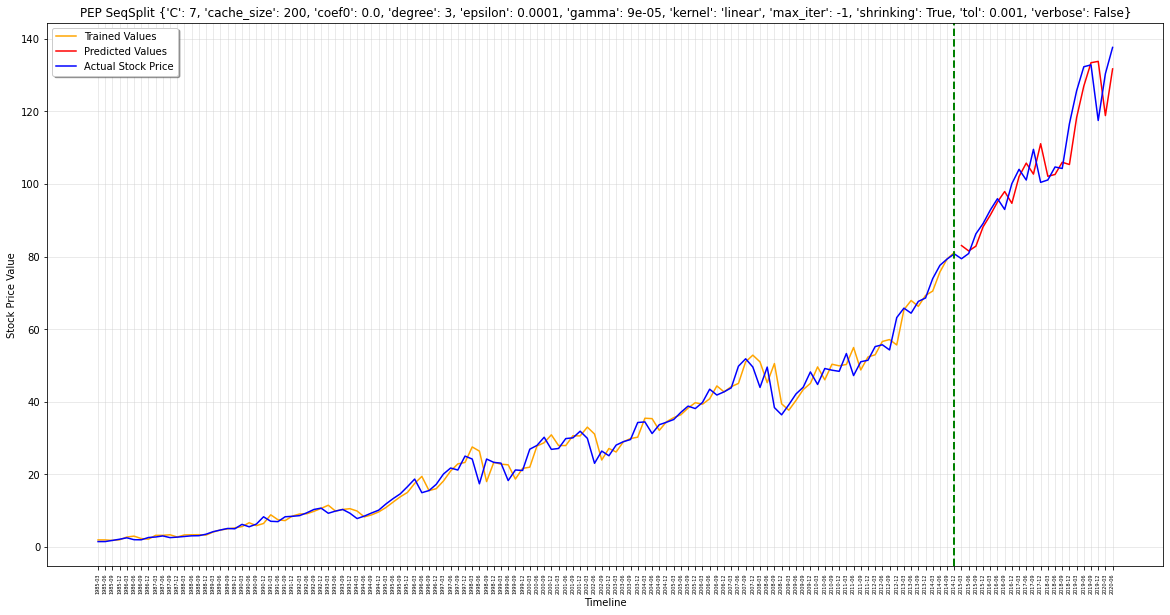

PEP MODEL RESULTS
 RMSE
 	Train: 2.7368668736073816
 	Test: 6.555449528131541
 	Dataset: 3.63284642482226
 MAPE
 	Train: 0.08928378929255727
 	Test: 0.045300160298824894
 	Dataset: 0.08220949931454437
 R2 Score Adj
 	Train: 0.9814235833276026
 	Test: 0.8462105044884777
 	Dataset: 0.989445811216541



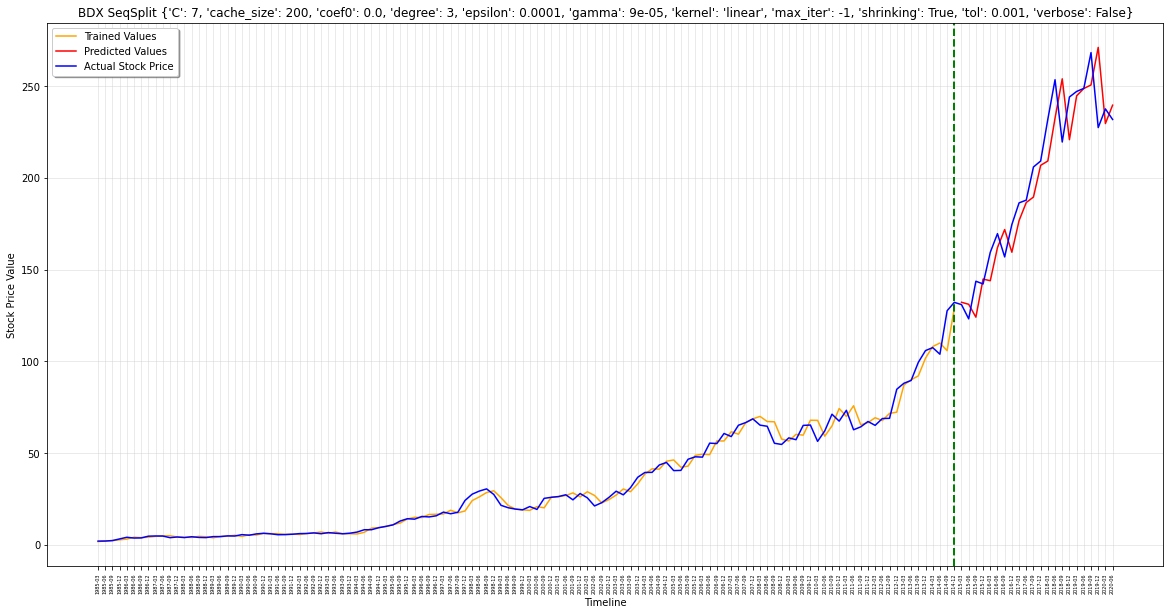

BDX MODEL RESULTS
 RMSE
 	Train: 3.8662192163022455
 	Test: 17.138270291518896
 	Dataset: 7.732089713319407
 MAPE
 	Train: 0.07435774504346873
 	Test: 0.06604206538324277
 	Dataset: 0.0730202581051107
 R2 Score Adj
 	Train: 0.9831740311203497
 	Test: 0.8100938075189009
 	Dataset: 0.9875144571838114



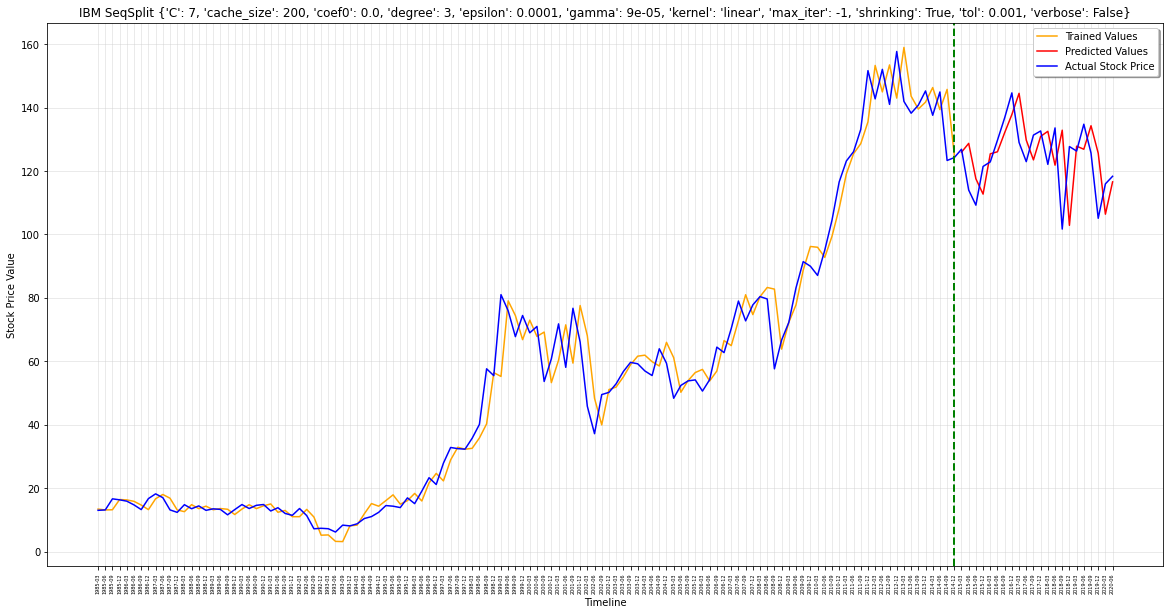

IBM MODEL RESULTS
 RMSE
 	Train: 7.298965987290074
 	Test: 11.986566928003809
 	Dataset: 8.2350001942854
 MAPE
 	Train: 0.1160909398398675
 	Test: 0.0782035086849118
 	Dataset: 0.10999715720655293
 R2 Score Adj
 	Train: 0.969915097075981
 	Test: -0.7595669608747055
 	Dataset: 0.9686621595701191



In [3]:
from lib.fundamental_lib import model_results_seq
#Results log
#Params={'C': 7, 'epsilon': 0.0001, 'gamma': 9e-05, 'kernel': 'linear', 'rs': [0, 2, 3, 4, 8]} #2
#Params={'C': 7, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear', 'rs': [0, 2, 3, 5, 8, 9]} #1
#Params={'C': 1, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear', 'rs': [1, 4, 7]} #P/S, P/B
#Params={'C': 1, 'epsilon': 0.0003, 'gamma': 9e-05, 'kernel': 'linear'}
Params={'C': 7, 'epsilon': 0.0001, 'gamma': 9e-05, 'kernel': 'linear', 'rs': [0, 2, 3, 4, 8]} #Serial
svr = SVR(kernel=Params['kernel'], C=Params['C'], gamma=Params['gamma'], epsilon=Params['epsilon'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_Manual_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_seq(data, svr, label=stock, scaling=False)

## 3.4. Sequential split - Scaled prediction variable

In [ ]:
from lib.fundamental_lib import holdout
svr = GridSearchCV(SVR(), n_jobs=-1, #error_score=1,
                   param_grid={"kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
                               "C": [1, 3, 5, 7],
                               "gamma": [0.00009, 0.00008, 0.00007, 0.00006, 0.0001],
                                "epsilon": [0.0001, 0.0003, 0.0005, 0.0008, 0.01]
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
holdout(data, svr, scaling=True, manual=True)

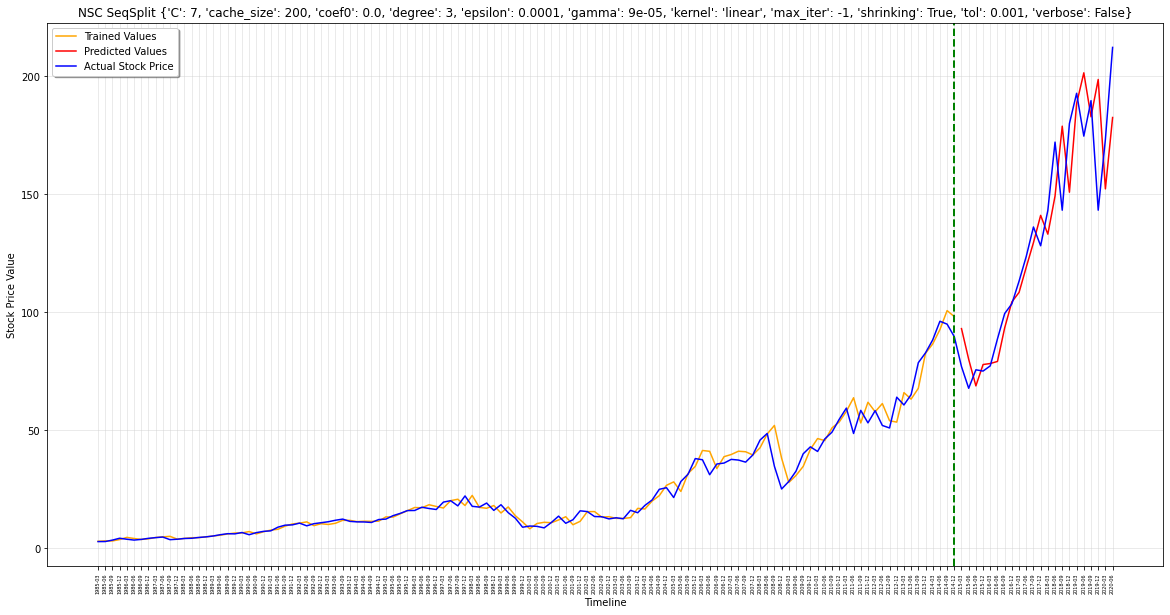

NSC MODEL RESULTS
 RMSE
 	Train: 3.8465815395617167
 	Test: 19.67268421631768
 	Dataset: 8.640802678649353
 MAPE
 	Train: 0.09443038575900878
 	Test: 0.10688094294951592
 	Dataset: 0.09643292292950995
 R2 Score Adj
 	Train: 0.9680616173435875
 	Test: 0.7917638363756885
 	Dataset: 0.968631132321283



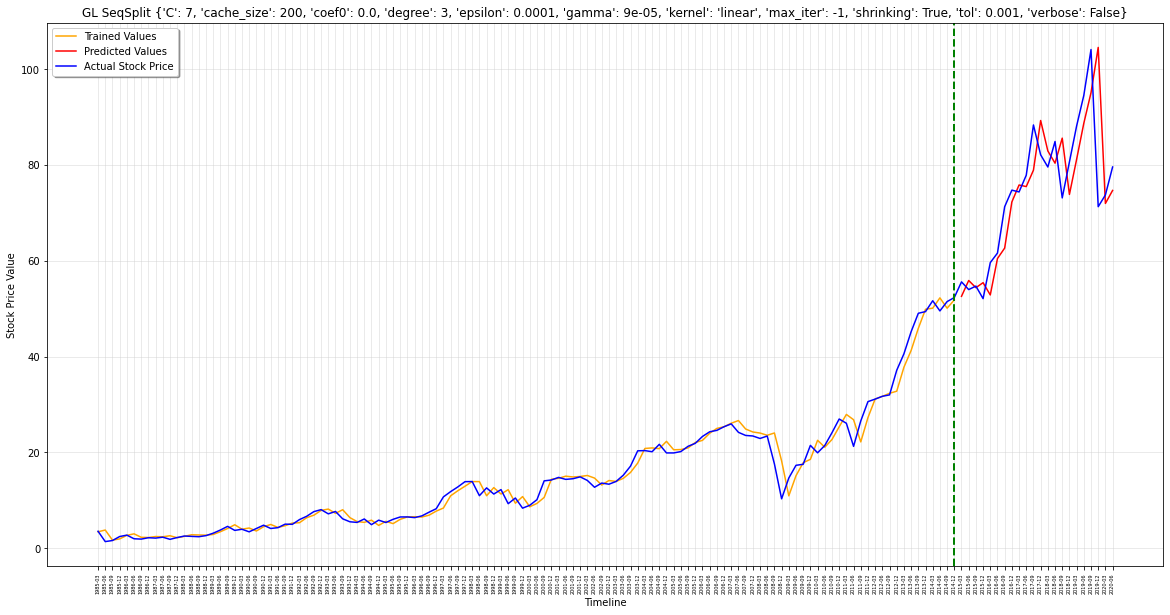

GL MODEL RESULTS
 RMSE
 	Train: 1.7761232939431246
 	Test: 9.292939424769346
 	Dataset: 4.0665824788052785
 MAPE
 	Train: 0.11132961170520193
 	Test: 0.08491858985454127
 	Dataset: 0.10708168511383694
 R2 Score Adj
 	Train: 0.9785087205208138
 	Test: 0.4396905024846265
 	Dataset: 0.9736281580214443



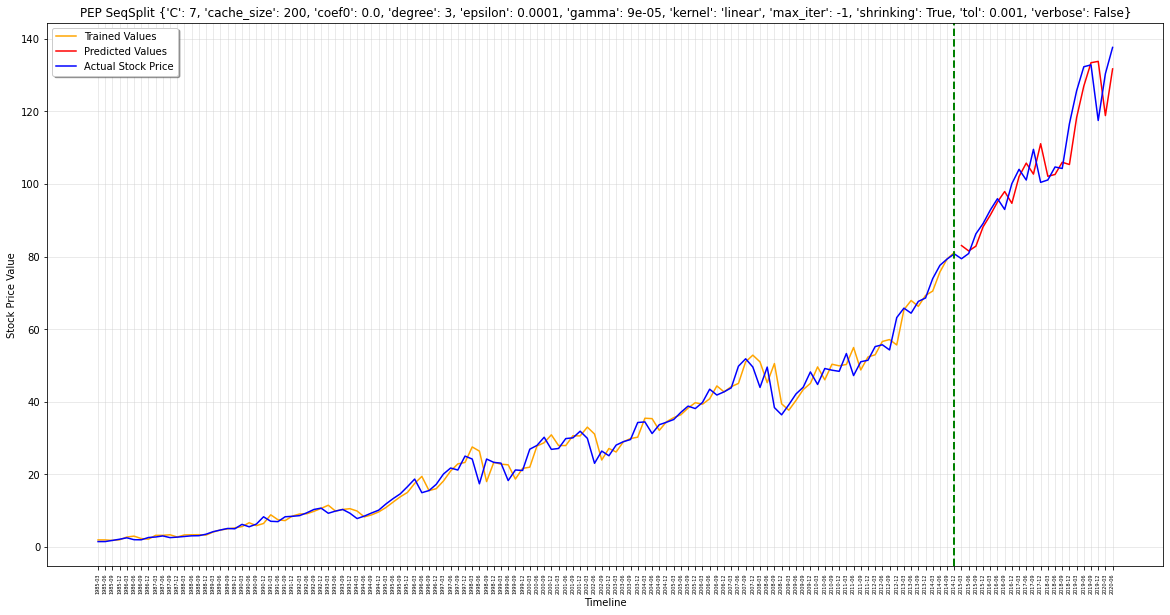

PEP MODEL RESULTS
 RMSE
 	Train: 2.7368668736073816
 	Test: 6.555449528131541
 	Dataset: 3.63284642482226
 MAPE
 	Train: 0.08928378929255727
 	Test: 0.045300160298824894
 	Dataset: 0.08220949931454437
 R2 Score Adj
 	Train: 0.9814235833276026
 	Test: 0.8462105044884777
 	Dataset: 0.989445811216541



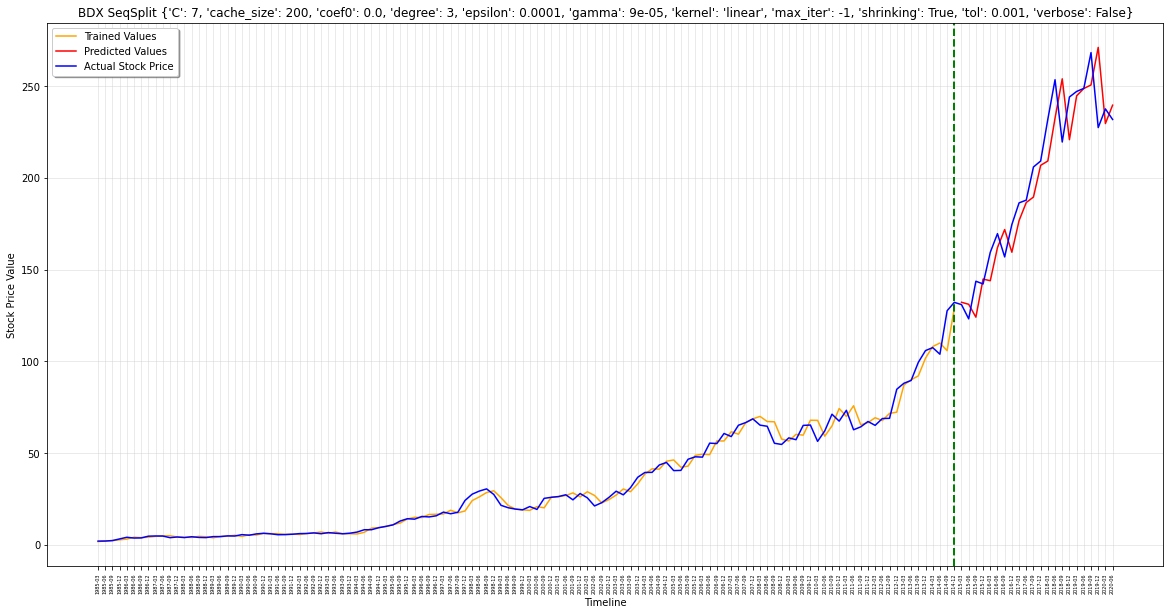

BDX MODEL RESULTS
 RMSE
 	Train: 3.8662192163022455
 	Test: 17.138270291518896
 	Dataset: 7.732089713319407
 MAPE
 	Train: 0.07435774504346873
 	Test: 0.06604206538324277
 	Dataset: 0.0730202581051107
 R2 Score Adj
 	Train: 0.9831740311203497
 	Test: 0.8100938075189009
 	Dataset: 0.9875144571838114



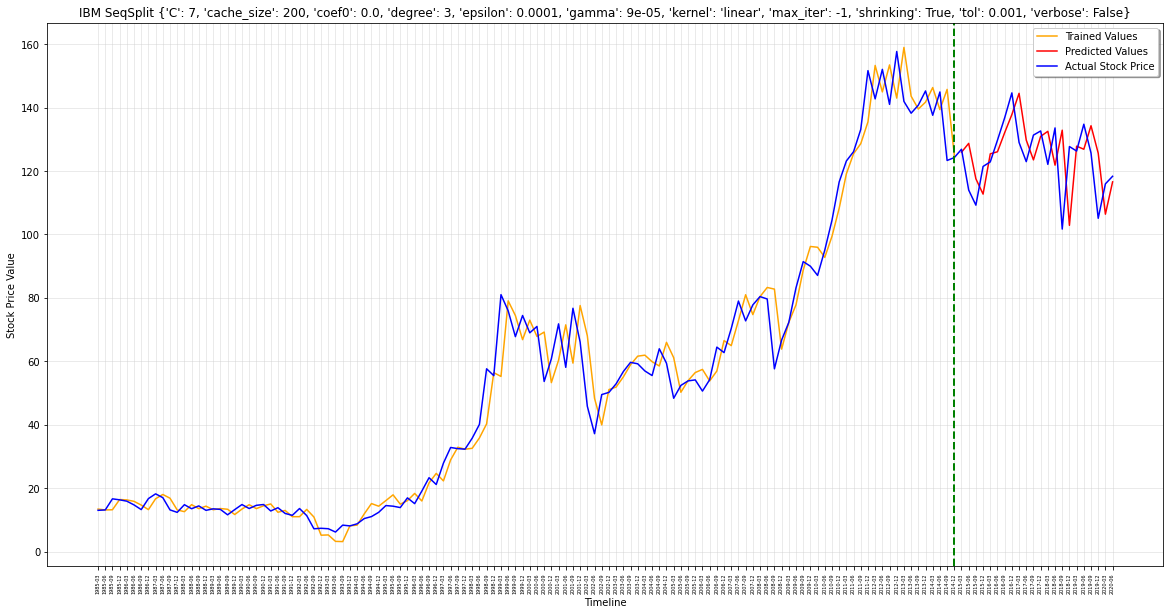

IBM MODEL RESULTS
 RMSE
 	Train: 7.298965987290074
 	Test: 11.986566928003809
 	Dataset: 8.2350001942854
 MAPE
 	Train: 0.1160909398398675
 	Test: 0.0782035086849118
 	Dataset: 0.10999715720655293
 R2 Score Adj
 	Train: 0.969915097075981
 	Test: -0.7595669608747055
 	Dataset: 0.9686621595701191



In [4]:
from lib.fundamental_lib import model_results_seq
#Results log
#Params={'C': 7, 'epsilon': 0.0001, 'gamma': 9e-05, 'kernel': 'linear', 'rs': [0, 2, 3, 4, 8]} #2
#Params={'C': 7, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear', 'rs': [0, 2, 3, 5, 8, 9]} #1
#Params={'C': 1, 'epsilon': 0.01, 'gamma': 9e-05, 'kernel': 'linear', 'rs': [1, 4, 7]} #P/S, P/B
#Params={'C': 1, 'epsilon': 0.0003, 'gamma': 9e-05, 'kernel': 'linear'}
Params={'C': 7, 'epsilon': 0.0001, 'gamma': 9e-05, 'kernel': 'linear', 'rs': [0, 2, 3, 4, 8]} #Serial
svr = SVR(kernel=Params['kernel'], C=Params['C'], gamma=Params['gamma'], epsilon=Params['epsilon'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_Manual_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_seq(data, svr, label=stock, scaling=True)